<a href="https://colab.research.google.com/github/yamnor/note/blob/main/ethylene-conical/note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# エチレンの円錐交差構造を探索する

解説記事は[こちら](https://yamnor.me/2203131203)

## 準備

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
energy = {}
s_squared = {}

## S<sub>0</sub> 状態の最小エネルギー構造を探索する

In [ ]:
# GAMESS の出力ファイルを取得する
!wget "https://raw.githubusercontent.com/yamnor/note/main/ethylene-conical/optimize.log"

In [ ]:
# 出力ファイルから、構造最適化に伴うポテンシャルエネルギー（ENERGY）の変化を読み取る
energy['optimize'] = [float(line.split()[3]) for line in open('optimize.log', 'r').readlines() if ' ENERGY= ' in line]

In [ ]:
# ENERGY の単位を au から kcal/mol に変換する
energy['optimize'] = [(x - energy['optimize'][0]) * 627.5094 for x in energy['optimize']]

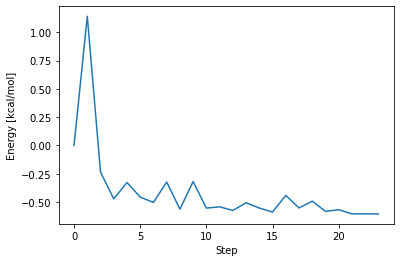

In [ ]:
# 構造最適化に伴う ENERGY の変化をグラフで表す
fig, ax = plt.subplots()
step = list(range(len(energy['optimize'])))
ax.plot(step, energy['optimize'])
ax.set_xlabel("Step")
ax.set_ylabel("Energy [kcal/mol]")
plt.show()

## S<sub>1</sub> 状態の最小エネルギー構造を探索する

In [ ]:
# GAMESS の出力ファイルを取得する
!wget "https://raw.githubusercontent.com/yamnor/note/main/ethylene-conical/optimize-excite.log"

In [ ]:
# 構造最適化に伴うポテンシャルエネルギー（ENERGY）の変化を１つの基底状態（S0）と２つの励起状態（S1, S2）に対して読み取る
energy['optimize-excite'] = []
for n in range(4):
  energy['optimize-excite'].append([float(line.split()[2]) for line in open('optimize-excite.log', 'r').readlines() if ' %d  A '%(n) in line])

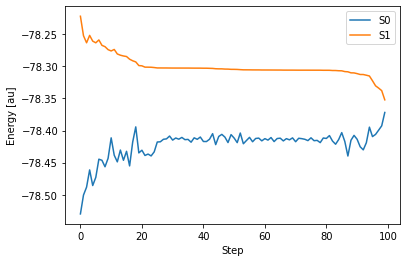

In [ ]:
# 基底（S0）および第一励起（S1）について、構造最適化に伴う ENERGY の変化をグラフで表す
fig, ax = plt.subplots()
step = list(range(len(energy['optimize-excite'][0])))
ax.plot(step, energy['optimize-excite'][0], label="S0")
ax.plot(step, energy['optimize-excite'][1], label="S1")
ax.set_xlabel("Step")
ax.set_ylabel("Energy [au]")
ax.legend()
plt.show()

## S<sub>0</sub>/S<sub>1</sub> 状態間の円錐交差構造を探索する（スピン反転 TD-DFT 法）

### １回目

In [ ]:
!wget "https://raw.githubusercontent.com/yamnor/note/main/ethylene-conical/conical-spnflp.log"

In [ ]:
energy['conical-1st'] = []
for n in range(4):
  energy['conical-1st'].append([float(line.split()[2]) for line in open('conical-spnflp.log', 'r').readlines() if ' %d  A '%(n) in line])

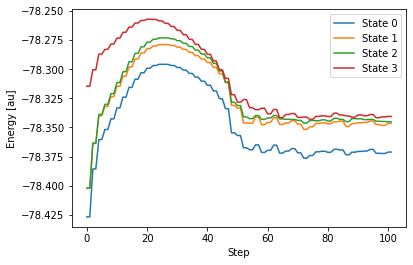

In [ ]:
fig, ax = plt.subplots()
step = list(range(len(energy['conical-1st'][0])))
ax.plot(step, energy['conical-1st'][0], label="State 0")
ax.plot(step, energy['conical-1st'][1], label="State 1")
ax.plot(step, energy['conical-1st'][2], label="State 2")
ax.plot(step, energy['conical-1st'][3], label="State 3")
ax.set_xlabel("Step")
ax.set_ylabel("Energy [au]")
ax.legend()
plt.show()

In [ ]:
s_squared['conical-1st'] = []
for n in range(1,4):
  s_squared['conical-1st'].append([float(line.split()[4]) for line in open('conical-spnflp.log', 'r').readlines() if ' %d  A '%(n) in line])

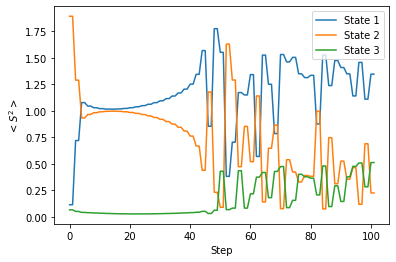

In [ ]:
fig, ax = plt.subplots()
step = list(range(len(s_squared['conical-1st'][0])))
ax.plot(step, s_squared['conical-1st'][0], label="State 1")
ax.plot(step, s_squared['conical-1st'][1], label="State 2")
ax.plot(step, s_squared['conical-1st'][2], label="State 3")
ax.set_xlabel("Step")
ax.set_ylabel("$<S^2>$")
ax.legend()
plt.show()

### ２回目

In [ ]:
!wget "https://raw.githubusercontent.com/yamnor/note/main/ethylene-conical/conical-spnflp-2.log"

In [ ]:
energy['conical-2nd'] = []
for n in range(4):
  energy['conical-2nd'].append([float(line.split()[2]) for line in open('conical-spnflp-2.log', 'r').readlines() if ' %d  A '%(n) in line])

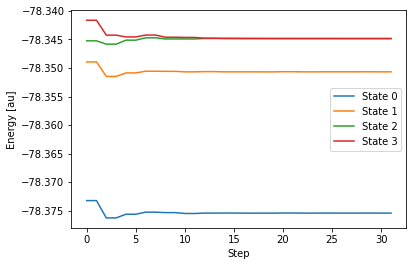

In [ ]:
step = list(range(len(energy['conical-2nd'][0])))
fig, ax = plt.subplots()
ax.plot(step, energy['conical-2nd'][0], label="State 0")
ax.plot(step, energy['conical-2nd'][1], label="State 1")
ax.plot(step, energy['conical-2nd'][2], label="State 2")
ax.plot(step, energy['conical-2nd'][3], label="State 3")
ax.set_xlabel("Step")
ax.set_ylabel("Energy [au]")
ax.legend()
plt.show()

In [ ]:
s_squared['conical-2nd'] = []
for n in range(1,4):
  s_squared['conical-2nd'].append([float(line.split()[4]) for line in open('conical-spnflp-2.log', 'r').readlines() if ' %d  A '%(n) in line])

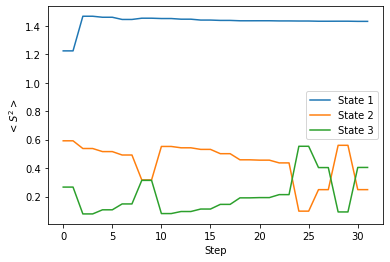

In [ ]:
step = list(range(len(s_squared['conical-2nd'][0])))
fig, ax = plt.subplots()
ax.plot(step, s_squared['conical-2nd'][0], label="State 1")
ax.plot(step, s_squared['conical-2nd'][1], label="State 2")
ax.plot(step, s_squared['conical-2nd'][2], label="State 3")
ax.set_xlabel("Step")
ax.set_ylabel("$<S^2>$")
ax.legend()
plt.show()

## S<sub>0</sub>/S<sub>1</sub> 状態間の円錐交差構造を探索する（通常の TD-DFT 法）

In [ ]:
!wget "https://raw.githubusercontent.com/yamnor/note/main/ethylene-conical/conical-excite.log"

In [ ]:
energy['conical-ntddft'] = []
for n in range(4):
  energy['conical-ntddft'].append([float(line.split()[2]) for line in open('conical-excite.log', 'r').readlines() if ' %d  A '%(n) in line])

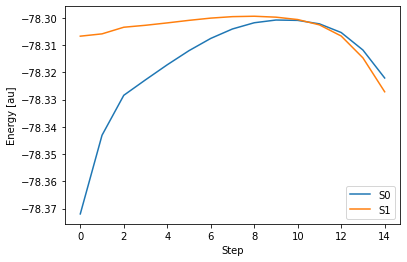

In [ ]:
fig, ax = plt.subplots()
step = list(range(len(energy['conical-ntddft'][0])))
ax.plot(step, energy['conical-ntddft'][0], label="S0")
ax.plot(step, energy['conical-ntddft'][1], label="S1")
ax.set_xlabel("Step")
ax.set_ylabel("Energy [au]")
ax.legend()
plt.show()